In [54]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import geopandas as gpd
from shapely.geometry import Point

In [55]:
crime  = pd.read_csv('data/crime2021.csv')
crime.dropna(subset=['Longitude', 'Latitude'], inplace=True)
crime_gdf = gpd.GeoDataFrame(crime, geometry=gpd.points_from_xy(crime['Longitude'], crime['Latitude']), crs='epsg:4326')
crime_gdf.drop(columns=['Longitude', 'Latitude'], inplace=True)
crime_gdf.head()

,Crime ID,Month,Reported by,Falls within,Location,LSOA code,LSOA name,Crime type,Last outcome category,Context,geometry
0,83da2d94838f010f645244f915376fe87a8629abf5c47b...,2021-09,Metropolitan Police Service,Metropolitan Police Service,On or near Parklands Drive,E01019087,Allerdale 007D,Vehicle crime,Under investigation,NaN,POINT (-3.37605 54.66306)
1,9348af7f46329886ab9a42482d860e346da42483048a26...,2021-09,Metropolitan Police Service,Metropolitan Police Service,On or near South Terrace,E01031400,Arun 011A,Violence and sexual offences,Under investigation,NaN,POINT (-0.53568 50.80415)
2,6601ff35897e249d0b5492b7787304256a760c13bf1503...,2021-09,Metropolitan Police Service,Metropolitan Police Service,On or near Coldicott Mews,E01031440,Arun 013D,Violence and sexual offences,Under investigation,NaN,POINT (-0.60563 50.79223)
3,e4e622a6600bc2aec6949242c2b60c61694539b77167d6...,2021-09,Metropolitan Police Service,Metropolitan Police Service,On or near Steeds Lane,E01024034,Ashford 010D,Violence and sexual offences,Under investigation,NaN,POINT (0.86969 51.10827)
4,1ad4d07e77a9ad580cb7504476d7f8f85c95bfdcf0d11c...,2021-09,Metropolitan Police Service,Metropolitan Police Service,On or near Marshalls Lea,E01017641,Aylesbury Vale 007A,Violence and sexual offences,Under investigation,NaN,POINT (-0.77786 51.82937)


In [56]:
set(crime_gdf['Crime type'])

{'Anti-social behaviour',
 'Bicycle theft',
 'Burglary',
 'Criminal damage and arson',
 'Drugs',
 'Other crime',
 'Other theft',
 'Possession of weapons',
 'Public order',
 'Robbery',
 'Shoplifting',
 'Theft from the person',
 'Vehicle crime',
 'Violence and sexual offences'}

In [57]:
crime_gdf = crime_gdf.to_crs(epsg=27700)
drug_crime = crime_gdf.loc[crime_gdf['Crime type']=='Drugs']
violent_crime = crime_gdf.loc[crime_gdf['Crime type']=='Violence and sexual offences']

In [58]:
lsoas = gpd.read_file('data/LDN-LSOAs/LDN-LSOAs.shp')

In [59]:
drug_lsoa = gpd.sjoin(drug_crime, lsoas, how='inner')
df_count = drug_lsoa.groupby('lsoa11cd').size().to_frame(name='drug_count').reset_index()
crime_lsoa = lsoas.merge(df_count, on='lsoa11cd', how='left')
crime_lsoa.fillna(0, inplace=True)
crime_lsoa.head()

,lsoa11cd,lsoa11nm,lsoa11nmw,objectid,st_areasha,st_lengths,geometry,drug_count
0,E01000001,City of London 001A,City of London 001A,1,133320.768872,2291.846072,"POLYGON ((532105.330 182017.386, 532162.728 18...",12.0
1,E01000002,City of London 001B,City of London 001B,2,226191.272990,2433.960112,"POLYGON ((532747.048 181793.042, 532671.921 18...",15.0
2,E01000003,City of London 001C,City of London 001C,3,57302.966538,1142.359799,"POLYGON ((532135.385 182204.275, 532158.489 18...",0.0
3,E01000005,City of London 001E,City of London 001E,4,190738.760504,2167.868343,"POLYGON ((533808.170 180773.910, 533649.287 18...",70.0
4,E01000006,Barking and Dagenham 016A,Barking and Dagenham 016A,5,144195.846857,1935.510354,"POLYGON ((545122.084 184321.013, 545271.951 18...",15.0


In [60]:
violent_lsoa = gpd.sjoin(violent_crime, lsoas, how='inner')
df_count = violent_lsoa.groupby('lsoa11cd').size().to_frame(name='violent_count').reset_index()
crime_lsoa = crime_lsoa.merge(df_count, on='lsoa11cd', how='left')
crime_lsoa.fillna(0, inplace=True)
crime_lsoa.head()

,lsoa11cd,lsoa11nm,lsoa11nmw,objectid,st_areasha,st_lengths,geometry,drug_count,violent_count
0,E01000001,City of London 001A,City of London 001A,1,133320.768872,2291.846072,"POLYGON ((532105.330 182017.386, 532162.728 18...",12.0,12.0
1,E01000002,City of London 001B,City of London 001B,2,226191.272990,2433.960112,"POLYGON ((532747.048 181793.042, 532671.921 18...",15.0,30.0
2,E01000003,City of London 001C,City of London 001C,3,57302.966538,1142.359799,"POLYGON ((532135.385 182204.275, 532158.489 18...",0.0,19.0
3,E01000005,City of London 001E,City of London 001E,4,190738.760504,2167.868343,"POLYGON ((533808.170 180773.910, 533649.287 18...",70.0,115.0
4,E01000006,Barking and Dagenham 016A,Barking and Dagenham 016A,5,144195.846857,1935.510354,"POLYGON ((545122.084 184321.013, 545271.951 18...",15.0,27.0


In [61]:
pubs = pd.read_csv('data/pubs.csv')
pubs['geometry'] = pubs.apply(lambda x: Point(x['longitude'], float(x['latitude'])), axis=1)
pubs = gpd.GeoDataFrame(pubs, geometry='geometry', crs='epsg:4326')
pubs = pubs.to_crs(epsg=27700)
pubs_lsoa = gpd.sjoin(pubs, lsoas, how='right')
df_count = pubs_lsoa.groupby('lsoa11cd').size().to_frame(name='pubs_count').reset_index()
crime_lsoa = crime_lsoa.merge(df_count[['lsoa11cd', 'pubs_count']], how='left')
crime_lsoa.head()

,lsoa11cd,lsoa11nm,lsoa11nmw,objectid,st_areasha,st_lengths,geometry,drug_count,violent_count,pubs_count
0,E01000001,City of London 001A,City of London 001A,1,133320.768872,2291.846072,"POLYGON ((532105.330 182017.386, 532162.728 18...",12.0,12.0,5
1,E01000002,City of London 001B,City of London 001B,2,226191.272990,2433.960112,"POLYGON ((532747.048 181793.042, 532671.921 18...",15.0,30.0,3
2,E01000003,City of London 001C,City of London 001C,3,57302.966538,1142.359799,"POLYGON ((532135.385 182204.275, 532158.489 18...",0.0,19.0,2
3,E01000005,City of London 001E,City of London 001E,4,190738.760504,2167.868343,"POLYGON ((533808.170 180773.910, 533649.287 18...",70.0,115.0,22
4,E01000006,Barking and Dagenham 016A,Barking and Dagenham 016A,5,144195.846857,1935.510354,"POLYGON ((545122.084 184321.013, 545271.951 18...",15.0,27.0,1


In [62]:
popden = pd.read_csv('data/popden2020.csv')
popden

,LSOA Code,LSOA Name,Mid-2020 population,Area Sq Km,People per Sq Km
0,E01011949,Hartlepool 009A,1944,0.52,3746
1,E01011950,Hartlepool 008A,1298,0.13,9796
2,E01011951,Hartlepool 007A,1208,0.21,5791
3,E01011952,Hartlepool 002A,1724,0.46,3715
4,E01011953,Hartlepool 002B,2026,0.88,2294
...,...,...,...,...,...
34748,W01001320,Merthyr Tydfil 007C,1430,1.11,1289
34749,W01001321,Merthyr Tydfil 007D,1576,4.98,317
34750,W01001322,Merthyr Tydfil 007E,1626,0.63,2600
34751,W01001324,Merthyr Tydfil 003E,2106,3.80,554


In [63]:
crime_lsoa = crime_lsoa.merge(popden, left_on='lsoa11cd', right_on='LSOA Code', how='left')
crime_lsoa['drug_rate'] = crime_lsoa['drug_count']/(crime_lsoa['Mid-2020 population']/1000)
crime_lsoa['violent_rate'] = crime_lsoa['violent_count']/(crime_lsoa['Mid-2020 population']/1000)
crime_lsoa['pubs_density'] = crime_lsoa['pubs_count']/crime_lsoa['Area Sq Km']
crime_lsoa.head()

,lsoa11cd,lsoa11nm,lsoa11nmw,objectid,st_areasha,st_lengths,geometry,drug_count,violent_count,pubs_count,LSOA Code,LSOA Name,Mid-2020 population,Area Sq Km,People per Sq Km,drug_rate,violent_rate,pubs_density
0,E01000001,City of London 001A,City of London 001A,1,133320.768872,2291.846072,"POLYGON ((532105.330 182017.386, 532162.728 18...",12.0,12.0,5,E01000001,City of London 001A,1749,0.13,13475,6.861063,6.861063,38.461538
1,E01000002,City of London 001B,City of London 001B,2,226191.272990,2433.960112,"POLYGON ((532747.048 181793.042, 532671.921 18...",15.0,30.0,3,E01000002,City of London 001B,1678,0.23,7347,8.939213,17.878427,13.043478
2,E01000003,City of London 001C,City of London 001C,3,57302.966538,1142.359799,"POLYGON ((532135.385 182204.275, 532158.489 18...",0.0,19.0,2,E01000003,City of London 001C,1900,0.06,32149,0.000000,10.000000,33.333333
3,E01000005,City of London 001E,City of London 001E,4,190738.760504,2167.868343,"POLYGON ((533808.170 180773.910, 533649.287 18...",70.0,115.0,22,E01000005,City of London 001E,2181,0.19,11503,32.095369,52.728106,115.789474
4,E01000006,Barking and Dagenham 016A,Barking and Dagenham 016A,5,144195.846857,1935.510354,"POLYGON ((545122.084 184321.013, 545271.951 18...",15.0,27.0,1,E01000006,Barking and Dagenham 016A,2117,0.15,14441,7.085498,12.753897,6.666667


In [64]:
# pubs = gpd.read_file('data/London_Pubs/London_Pubs.shp')
# df_count = pubs.groupby('lsoa').size().to_frame(name='pubs').reset_index()
# crime_lsoa = crime_lsoa.merge(df_count, left_on='lsoa11nm', right_on='lsoa', how='left')
# crime_lsoa['pubs'].fillna(0, inplace=True)
# crime_lsoa.head()

In [65]:
imd = pd.read_csv('data/IoD2019_Transformed_Scores.csv')
imd.columns=['LSOA11CD', 'LSOANM', 'LADCD', 'LADNM', 'Income', 'Employment', 'Education', 'Health', 'Crime', 'Barriers', 'Environment']
imd.head()

,LSOA11CD,LSOANM,LADCD,LADNM,Income,Employment,Education,Health,Crime,Barriers,Environment
0,E01000001,City of London 001A,E09000001,City of London,0.010,0.071,0.002,0.512,0.127,33.518,32.163
1,E01000002,City of London 001B,E09000001,City of London,2.131,1.173,0.009,2.280,0.039,23.197,20.749
2,E01000003,City of London 001C,E09000001,City of London,12.962,17.523,4.964,14.094,2.542,58.754,45.907
3,E01000005,City of London 001E,E09000001,City of London,37.706,32.041,21.974,13.706,1.269,58.227,28.053
4,E01000006,Barking and Dagenham 016A,E09000002,Barking and Dagenham,19.180,9.390,14.208,9.505,12.555,71.868,25.337


In [66]:
crime_lsoa = crime_lsoa.merge(imd[['LSOA11CD', 'Income', 'Employment', 'Education', 'Health', 'Crime', 'Barriers', 'Environment']], left_on='lsoa11cd', right_on='LSOA11CD', how='left')
crime_lsoa.head()

,lsoa11cd,lsoa11nm,lsoa11nmw,objectid,st_areasha,st_lengths,geometry,drug_count,violent_count,pubs_count,...,violent_rate,pubs_density,LSOA11CD,Income,Employment,Education,Health,Crime,Barriers,Environment
0,E01000001,City of London 001A,City of London 001A,1,133320.768872,2291.846072,"POLYGON ((532105.330 182017.386, 532162.728 18...",12.0,12.0,5,...,6.861063,38.461538,E01000001,0.010,0.071,0.002,0.512,0.127,33.518,32.163
1,E01000002,City of London 001B,City of London 001B,2,226191.272990,2433.960112,"POLYGON ((532747.048 181793.042, 532671.921 18...",15.0,30.0,3,...,17.878427,13.043478,E01000002,2.131,1.173,0.009,2.280,0.039,23.197,20.749
2,E01000003,City of London 001C,City of London 001C,3,57302.966538,1142.359799,"POLYGON ((532135.385 182204.275, 532158.489 18...",0.0,19.0,2,...,10.000000,33.333333,E01000003,12.962,17.523,4.964,14.094,2.542,58.754,45.907
3,E01000005,City of London 001E,City of London 001E,4,190738.760504,2167.868343,"POLYGON ((533808.170 180773.910, 533649.287 18...",70.0,115.0,22,...,52.728106,115.789474,E01000005,37.706,32.041,21.974,13.706,1.269,58.227,28.053
4,E01000006,Barking and Dagenham 016A,Barking and Dagenham 016A,5,144195.846857,1935.510354,"POLYGON ((545122.084 184321.013, 545271.951 18...",15.0,27.0,1,...,12.753897,6.666667,E01000006,19.180,9.390,14.208,9.505,12.555,71.868,25.337


In [67]:
crime_lsoa.drop(columns=['lsoa11nmw', 'objectid', 'st_areasha', 'st_lengths', 'LSOA Code', 'LSOA11CD', 'Area Sq Km', 'LSOA Name', 'Mid-2020 population'], inplace=True)
crime_lsoa.rename(columns={'People per Sq Km': 'popden'}, inplace=True)
crime_lsoa.head()

,lsoa11cd,lsoa11nm,geometry,drug_count,violent_count,pubs_count,popden,drug_rate,violent_rate,pubs_density,Income,Employment,Education,Health,Crime,Barriers,Environment
0,E01000001,City of London 001A,"POLYGON ((532105.330 182017.386, 532162.728 18...",12.0,12.0,5,13475,6.861063,6.861063,38.461538,0.010,0.071,0.002,0.512,0.127,33.518,32.163
1,E01000002,City of London 001B,"POLYGON ((532747.048 181793.042, 532671.921 18...",15.0,30.0,3,7347,8.939213,17.878427,13.043478,2.131,1.173,0.009,2.280,0.039,23.197,20.749
2,E01000003,City of London 001C,"POLYGON ((532135.385 182204.275, 532158.489 18...",0.0,19.0,2,32149,0.000000,10.000000,33.333333,12.962,17.523,4.964,14.094,2.542,58.754,45.907
3,E01000005,City of London 001E,"POLYGON ((533808.170 180773.910, 533649.287 18...",70.0,115.0,22,11503,32.095369,52.728106,115.789474,37.706,32.041,21.974,13.706,1.269,58.227,28.053
4,E01000006,Barking and Dagenham 016A,"POLYGON ((545122.084 184321.013, 545271.951 18...",15.0,27.0,1,14441,7.085498,12.753897,6.666667,19.180,9.390,14.208,9.505,12.555,71.868,25.337


In [68]:
crime_lsoa.to_file('data/crime_lsoa.geojson', driver='GeoJSON')

/Users/jiang/opt/anaconda3/envs/msda2021/lib/python3.8/site-packages/geopandas/io/file.py:299: FutureWarning: pandas.Int64Index is deprecated and will be removed from pandas in a future version. Use pandas.Index with the appropriate dtype instead.
  pd.Int64Index,


/Users/jiang/opt/anaconda3/envs/msda2021/lib/python3.8/site-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(
/Users/jiang/opt/anaconda3/envs/msda2021/lib/python3.8/site-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(
/Users/jiang/opt/anaconda3/envs/msda2021/lib/python3.8/site-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in a

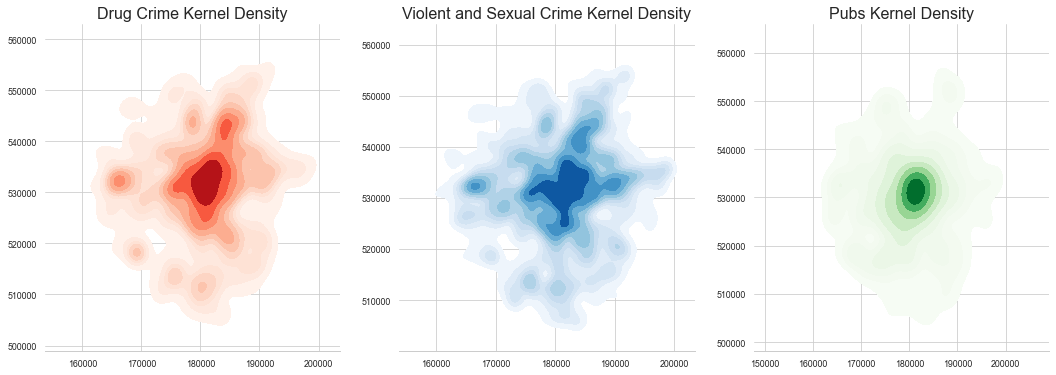

In [73]:
import seaborn as sns
import matplotlib.pyplot as plt

fig, ax = plt.subplots(1,3, figsize=(18,6))


sns.kdeplot(drug_lsoa['geometry'].y, drug_lsoa['geometry'].x, shade=True, cmap='Reds', ax=ax[0])
sns.kdeplot(violent_lsoa['geometry'].y, violent_lsoa['geometry'].x, shade=True, cmap='Blues', ax=ax[1])
sns.kdeplot(pubs['geometry'].y, pubs['geometry'].x, shade=True, cmap='Greens', ax=ax[2])

ax[0].set_title('Drug Crime Kernel Density', fontsize=16)
ax[1].set_title('Violent and Sexual Crime Kernel Density', fontsize=16)
ax[2].set_title('Pubs Kernel Density', fontsize=16)
sns.set(style = 'whitegrid') # aesthetics
sns.despine(left=True) # aesthetics
sns.set_context('paper') # aesthetics

plt.axis('equal')
plt.savefig('data/kde.png', dpi=200)
plt.show()